In [1]:
import pandas as pd
import warnings
import itertools
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("C:/Users/saurabh/Desktop/salesdata4.csv",index_col=0)
data.head()

,Sales
DATE,
2/1/1970,42.5578
3/1/1970,41.6215
4/1/1970,40.1982
5/1/1970,39.9321
6/1/1970,41.1847


In [3]:
data.index = pd.to_datetime(data.index)
data.columns = ['Sales in dollars']
data.tail()

,Sales in dollars
DATE,
2009-10-01,89.3811
2009-11-01,89.4576
2009-12-01,110.8777
2010-01-01,119.2473
2010-02-01,110.7525


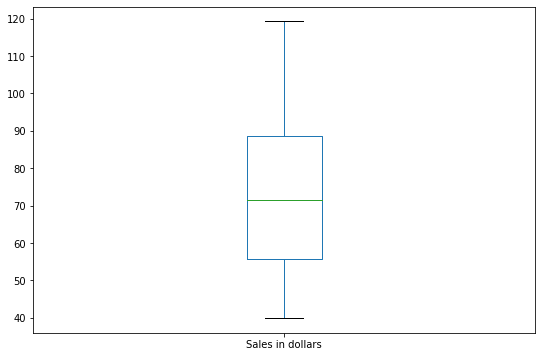

In [20]:
data.plot.box(figsize=(9, 6))
plt.show()

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 481 entries, 1970-02-01 to 2010-02-01
Data columns (total 1 columns):
Sales in dollars    481 non-null float64
dtypes: float64(1)
memory usage: 7.5 KB


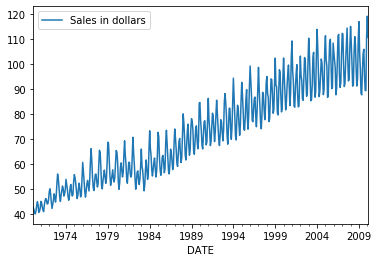

In [22]:
data.plot()

In [23]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [24]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:5517.5598408812075
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:4801.5941912598755
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2425.8448170023757
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2367.5341572577217
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2342.8640319898423
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2279.7197329781884
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2374.6348527167156
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2303.680604671322
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:4878.26343490878
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:4198.108475042688
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2205.4123138199566
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2140.951060034732
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2163.7499359283024
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2067.1504964655123
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2152.469786781711
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2142.0124982688703
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:3087.769412943058
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2672.7524503298628

In [26]:
mod = sm.tsa.statespace.SARIMAX(data,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5746      0.048     12.033      0.000       0.481       0.668
ma.L1         -0.9421      0.021    -45.935      0.000      -0.982      -0.902
ma.S.L12      -0.6894      0.034    -20.537      0.000      -0.755      -0.624
sigma2         3.8993      0.181     21.496      0.000       3.544       4.255


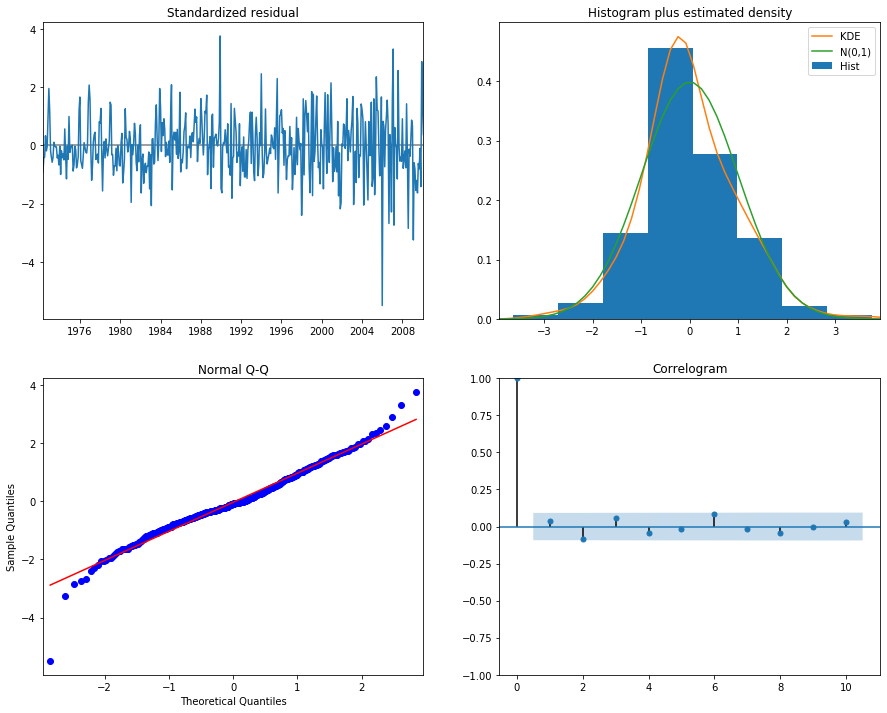

In [41]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [30]:
pred = results.get_prediction(start=pd.to_datetime('1999-01-01'), dynamic=False)
pred_ci = pred.conf_int()

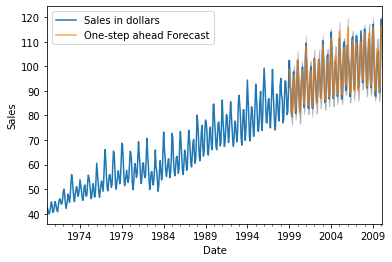

In [31]:
ax = data['1970':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()

plt.show()

In [33]:
from sklearn.metrics import mean_squared_error
y_forecasted = pred.predicted_mean
y_truth = data['1999-01-01':]
mean_squared_error(y_truth , y_forecasted)

# Compute the mean square error
#mse = ((y_forecasted - y_truth) ** 2).mean()

6.698467860290588

In [35]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('1999-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

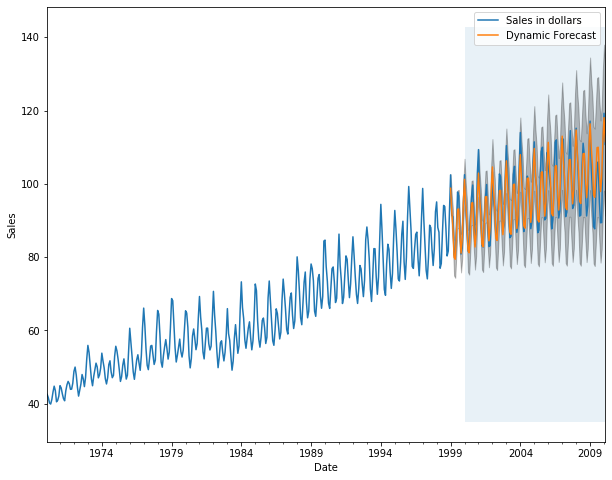

In [38]:
ax = data['1970':].plot(label='observed', figsize=(10, 8))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2000-01-01'), data.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Sales')

plt.legend()
plt.show()


In [39]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=200)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

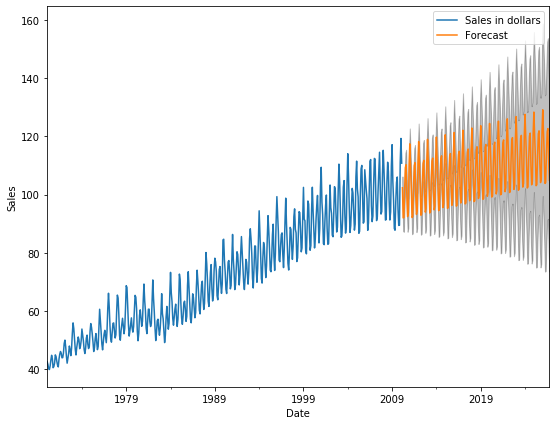

In [41]:
ax = data.plot(label='observed', figsize=(9, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')

plt.legend()
plt.show()